# Extracting distance travelled from on screen text with Tesseract


In [8]:
# Import some things
import numpy as np
import cv2 as cv
import glob
import pickle
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
sns.set()
import pytesseract # needs to be tesseract 4.1 
# e.g. from here https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr?field.series_filter=bionic 
# then sudo apt install tesseract-ocr

In [10]:
# If the code doesn't run, install some new packages:
# ! pip install Pillow

[sudo] password for mathew: 


In [9]:
# Extract text from an image that works
# filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_difficult/images_png/0747.png'
# filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/images_png/4072.png'
filename = '/home/mathew/work/data/SevernTrent_250220/pipe_vid_text/images_png/4072.png'
text = pytesseract.image_to_string(Image.open(filename))
plt.imshow(Image.open(filename))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [77]:
print(text)

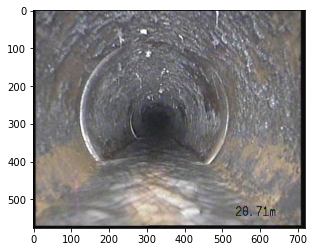

In [78]:
# Extract text from an image that doesn't work...
# filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_difficult/images_png/0005.png' # 0029.png
filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/images_png/4072.png'
text2 = pytesseract.image_to_string(Image.open(filename))
plt.imshow(Image.open(filename))

<IPython.core.display.Javascript object>


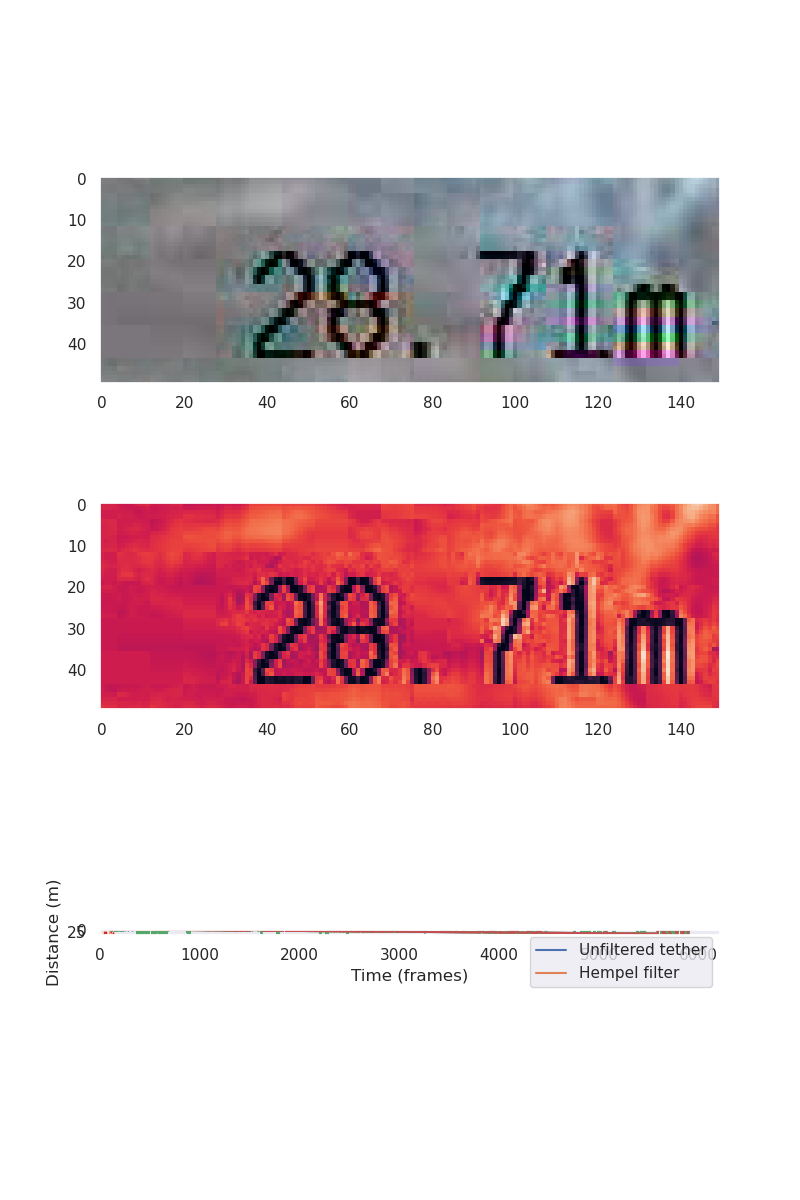

2671


98.0

In [62]:
# Image processing to look at just the text in isolation
# filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_difficult/images_png/0747.png' # 0029.png
filename = '/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/images_png/4072.png'
img =  cv.imread(filename, cv.IMREAD_UNCHANGED)# Image.open(filename)

img_bw = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # img
        
# Apply threshold to get image with only b&w (binarization)
# https://medium.com/free-code-camp/getting-started-with-tesseract-part-i-2a6a6b1cf75e
blur = cv.GaussianBlur(img_bw,(5,5),0)
thresh,img_bin = cv.threshold(blur[500:550,500:650], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig = plt.figure(figsize=(8,12))
plt.subplot(3,1, 1)
plt.imshow(img[500:550,500:650])
plt.grid(False)
plt.subplot(3,1, 2)
plt.imshow(img_bw[500:550,500:650])
plt.grid(False)
plt.subplot(3,1, 3)
plt.imshow(img_bin) #[500:550,500:650]) #[500:550,500:650])
plt.grid(False)
print(pytesseract.image_to_string(img_bin,lang='eng', config='--psm 7 -c tessedit_char_whitelist=0123456789'))
plt.show()fig = plt.figure
# fig.savefig('tether_text_example.png', bbox_inches='tight')
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY))
thresh

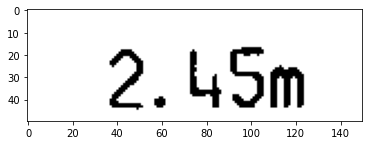

In [57]:
# img = Image.open(filename)
t = 100
plt.imshow(blur[500:550,500:650]> t, cmap='gray', vmin=0, vmax=1)

In [58]:
img_bin = blur[500:550,500:650]> t

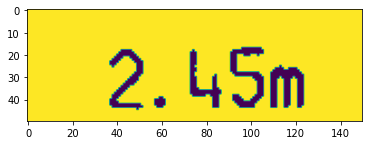

In [59]:
plt.imshow(img_bin)

In [60]:
cv.threshold?

In [26]:
#try upscaling the image
# img_up = cv.resize(img, None, fx=1.5, fy=1.5, interpolation = cv.INTER_CUBIC)
img_up = cv.resize?
img_up

NameError: name 'img_up' is not defined

In [33]:
img = cv.imread(filename, cv.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)

Original Dimensions :  (576, 720, 3)


In [40]:
scale_percent = 150 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv.resize(img, dim, interpolation = cv.INTER_CUBIC)

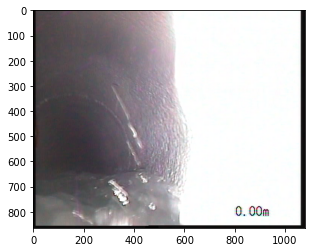

In [42]:
plt.imshow(resized)
text3 = pytesseract.image_to_string(resized)
print(text3)

In [58]:
# convert to bw
img_bw = cv.cvtColor(resized, cv.COLOR_BGR2GRAY) # img

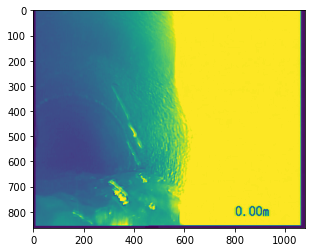

In [59]:
plt.imshow(img_bw)

In [71]:
text4 = pytesseract.image_to_string(img_bw, lang='eng')
print(text4)

In [61]:
# Apply threshold to get image with only b&w (binarization)
# https://medium.com/free-code-camp/getting-started-with-tesseract-part-i-2a6a6b1cf75e
img_bin = cv.threshold(img_bw, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

2. 45m


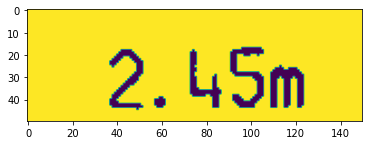

In [63]:
plt.imshow(img_bin)
text5 = pytesseract.image_to_string(img_bin, lang='eng')
print(text5)

In [69]:
#save image
# cv.imwrite('work/data/test_images/bw_img0029.jpg', img)
# cv.imwrite('work/data/test_images/binary_bigger_img0029.jpg', img_bin)
cv.imwrite('work/data/test_images/crop_img0029.jpg', img_crop)

True

In [61]:
img_crop = img_bin[750:850,700:1000]

<ipython-input-62-f543c2e875a6>:1: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img_crop> 100, cmap='gray')
<ipython-input-62-f543c2e875a6>:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img_crop> 100, cmap='gray')


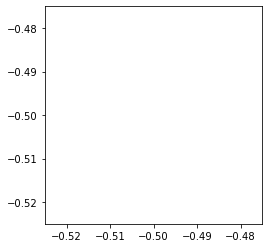

In [62]:
plt.imshow(img_crop> 100, cmap='gray')

In [70]:
text6 = pytesseract.image_to_string(img_crop,lang='eng',config='--psm 7')
print(text6)

0. 00m


In [88]:
# how many frames have legible text?
# file1 = open("/home/rugged/work/data/SevernTrent_250220/pipe_vid_difficult/tether_text_.txt","a") 
file1 = open("/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/tether_text.txt","a") 

import os
for file in sorted(os.listdir("/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/images_png/")):
    if file.endswith(".png"):
        filename = os.path.join("/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/images_png", file)
        img = cv.imread(filename, cv.IMREAD_UNCHANGED)
        
        scale_percent = 150 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        resized = cv.resize(img, dim, interpolation = cv.INTER_CUBIC)

        # function that binarizes the image
        img_bin = process_image(resized)
        # crop
        img_crop = img_bin[750:850,750:975]
        # extract text
        text7 = pytesseract.image_to_string(img_crop,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')


        # binarize the unscaled image
        img_unscaled_bin = process_image(img)
        # crop
        img_unscaled_crop = img_unscaled_bin[500:550,500:650]
        # extract text
        text8 = pytesseract.image_to_string(img_unscaled_crop,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')

        # binarizes the cropped image
        img_crop_bin = process_image(img[500:550,500:650])

        # extract text
        text9 = pytesseract.image_to_string(img_crop_bin,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')

        tether_string = "{},{},{},{},{},{},{}".format(file[0:4],text7,replace_chars(text7),text8,replace_chars(text8),text9,replace_chars(text9))
        
        file1.write(tether_string + '\n')
#         print("File:{} | Thresh:{} | Text:{}".format(file,thresh,text7))
#         plt.imshow(img_crop, cmap = 'gray')
#         plt.show()




file1.close() 

In [41]:
import pkg_resources
pkg_resources.working_set.by_key['pytesseract'].version

'0.3.4'

In [20]:
my_string = "{},{}".format(file[0:4],text7)
print(my_string)

4198,29. 1


In [55]:
# Just the text extraction text outside of a loop
img = cv.imread(filename, cv.IMREAD_UNCHANGED)
        
scale_percent = 150 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv.resize(img, dim, interpolation = cv.INTER_CUBIC)

# function that binarizes the image
img_bin = process_image(resized)
# crop
img_crop = img_bin[750:850,750:975]
# extract text
text7 = pytesseract.image_to_string(img_crop,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')


# binarize the unscaled image
img_unscaled_bin = process_image(img)
# crop
img_unscaled_crop = img_unscaled_bin[500:550,500:650]
# extract text
text8 = pytesseract.image_to_string(img_unscaled_crop,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')

# binarizes the cropped image
img_crop_bin = process_image(img[500:550,500:650])

# extract text
text9 = pytesseract.image_to_string(img_crop_bin,lang='eng',config='--psm 7 -c tessedit_char_whitelist=0123456789.')

tether_string = "{},{},{},{},{},{},{}".format(file[0:4],text7,replace_chars(text7),text8,replace_chars(text8),text9,replace_chars(text9))

print(tether_string)
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.imshow(img_crop, cmap = 'gray')
plt.subplot(3,1,2)
plt.imshow(img_unscaled_crop, cmap = 'gray')
plt.subplot(3,1,3)
plt.imshow(img_crop_bin, cmap = 'gray')
plt.show()

NameError: name 'filename' is not defined

In [85]:
def process_image(image):
    """
    Blurs and binarizes the image
    """
    # convert to bw
    img_bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # blur
    blur = cv.GaussianBlur(img_bw,(5,5),0)
    
    #binarize
    thresh,img_bin = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return img_bin

In [39]:
import re
def replace_chars(text):
    """
    Replaces all characters instead of numbers from 'text'.
    
    :param text: Text string to be filtered
    :return: Resulting number
    
    from https://return2.net/python-tesseract-4-0-get-numbers-only/
    """
    list_of_numbers = re.findall(r'\d+', text)
    result_number = ''.join(list_of_numbers)
    return result_number


In [81]:
ocr_result = pytesseract.image_to_string(img_bin, lang='eng')

print(ocr_result)
print(replace_chars(ocr_result))

Q. 00m
00


In [22]:
tether_string

'7027,92.90'

In [40]:
replace_chars(tether_string)


'70279290'

In [4]:
import pandas as pd

In [5]:
# fname = "/home/rugged/work/data/SevernTrent_250220/pipe_vid_difficult/tether_text_difficult.txt"
fname = "/home/rugged/work/data/SevernTrent_250220/pipe_vid_text/tether_text.txt"
tether = pd.read_csv(fname,header=None)

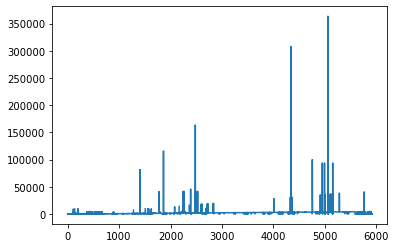

In [96]:
plt.plot(tether[6])
# tether.loc[1289]
# tether.iloc[4060:4080].plot(y=2)

In [6]:
clean_tether = tether[6]

In [7]:
clean_tether.loc[clean_tether>5000] = np.nan

/home/rugged/anaconda3/envs/pipebots/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


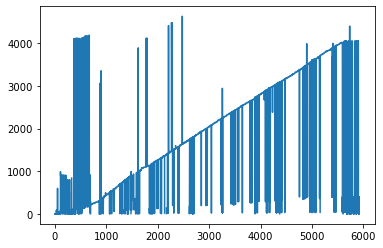

In [10]:
plt.plot(clean_tether) #[0:2000])

In [13]:
%matplotlib notebook
# import scipy.signal as sp
# filt_tether = sp.medfilt(clean_tether, kernel_size=7)

In [8]:
hempel_tether,outliers = hampel_filter_forloop(clean_tether, 5, n_sigmas=3)

In [39]:
copy_tether = clean_tether.copy()

<IPython.core.display.Javascript object>


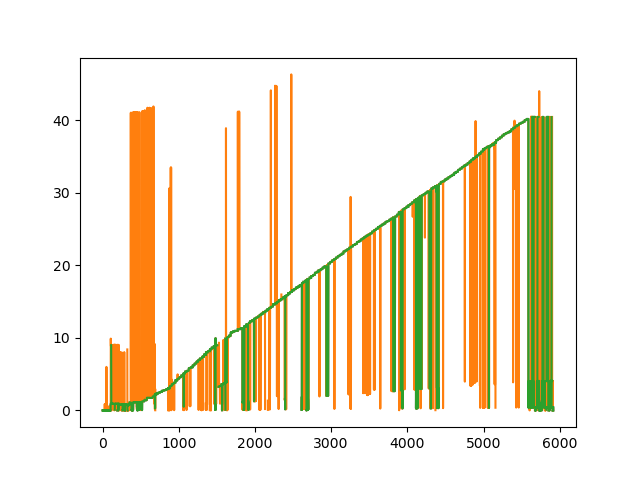

In [51]:
plt.plot(hempel_tether/100)

<IPython.core.display.Javascript object>


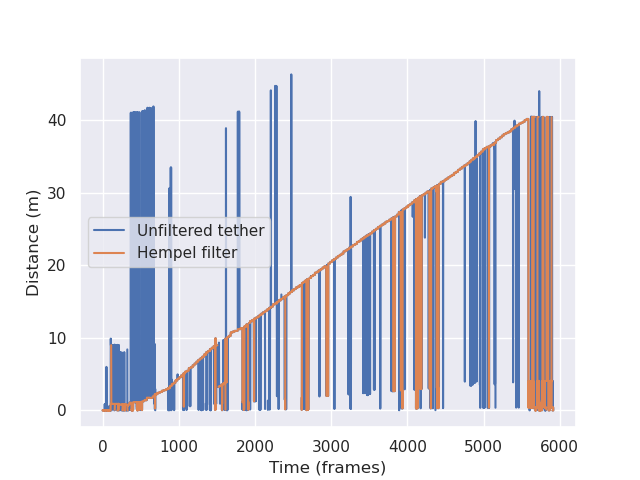

In [18]:
fig = plt.figure
plt.plot(clean_tether/100)
# plt.plot(filt_tether)
plt.plot(hempel_tether/100)
plt.gca().set_xlabel('Time (frames)')
plt.gca().set_ylabel('Distance (m)')
plt.legend(('Unfiltered tether','Hempel filter'))
plt.show()
# filt_tether = sp.medfilt(clean_tether, kernel_size=7)
# plt.plot(filt_tether[100:125])
plt.savefig('tether_filter_example', bbox_inches='tight')

In [16]:
fig?

In [68]:
np.max(hempel_tether/100)

40.49

In [2]:
def hampel_filter_forloop(input_series, window_size, n_sigmas=3):
    # from https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d
    # see also https://pypi.org/project/hampel/
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    
    indices = []
    
    # possibly use np.nanmedian 
    for i in range((window_size),(n - window_size)):
        x0 = np.nanmedian(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.nanmedian(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices